In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train1 = pd.read_csv("/content/drive/MyDrive/Deep Learning/XY_train_0.85.csv")

In [4]:
Y_train1 = train1.iloc[:, 5]
X_train1 = train1.iloc[:, 0:5]

In [5]:
test1 = pd.read_csv("/content/drive/MyDrive/Deep Learning/XY_test_0.85.csv")

In [6]:
Y_test1 = test1.iloc[:, 5]
X_test1 = test1.iloc[:, 0:5]

In [7]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_train1)
#X_train1 = scaler.transform(X_train1)

In [8]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_test1)
#X_test1 = scaler.transform(X_test1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [11]:
# Extra Trees regression
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor()

In [12]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [13]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [14]:
# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=model_forest,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'r2',
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [15]:
#model_forest_best= random_cv.fit(X_train1,Y_train1)

In [16]:
#model_forest_best.best_estimator_

In [17]:
#model_forest_best.best_score_

In [18]:
from sklearn import ensemble
model1 = ensemble.RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
model1.fit(X_train1,Y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
model1.score(X_train1,Y_train1)

0.9899783963109839

In [21]:
model1.score(X_test1,Y_test1)

0.9779077500630796

In [22]:
y_pred = model1.predict(X_test1)

In [23]:
count = 0
for i in range(len(Y_test1)):
  if abs(y_pred[i]-Y_test1.iloc[i]) <=0.5:
    count += 1

count

66

In [24]:
import sklearn.metrics as sm
y_test = Y_test1
y_test_pred = y_pred
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Regressor model performance:
Mean absolute error(MAE) = 0.24
Mean squared error(MSE) = 0.15
Median absolute error = 0.15
Explain variance score = 0.98
R2 score = 0.98


In [25]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model1, X = X_train1, y = Y_train1, cv = 5)
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))

Accuracy:94.41 %
Standard Deviation:1.43 %


In [26]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# create model
model = model1
# evaluate model
scores = cross_val_score(model, X= X_train1, y= Y_train1, cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores),std(scores)))

Accuracy: 0.942 (0.013)


In [27]:
print(min(scores))

0.9196197629983569


In [28]:
print(mean(scores))

0.9417698495368594


In [29]:
print(max(scores))

0.9612117939554394


In [30]:
print(scores)

[0.96121179 0.95151258 0.92311703 0.95015646 0.91961976 0.94020063
 0.93771622 0.95528863 0.92655967 0.95701661 0.93909965 0.92740777
 0.94033828 0.94588447 0.95141819]


In [31]:
#data2 = pd.read_csv("/content/drive/MyDrive/Deep Learning/Results.csv", index_col= "ID")
#data2.head()

In [32]:
#data2 = pd.DataFrame(y_test_pred, y_test)

In [33]:
#data2.to_csv('/content/drive/MyDrive/Deep Learning/Results1.csv')

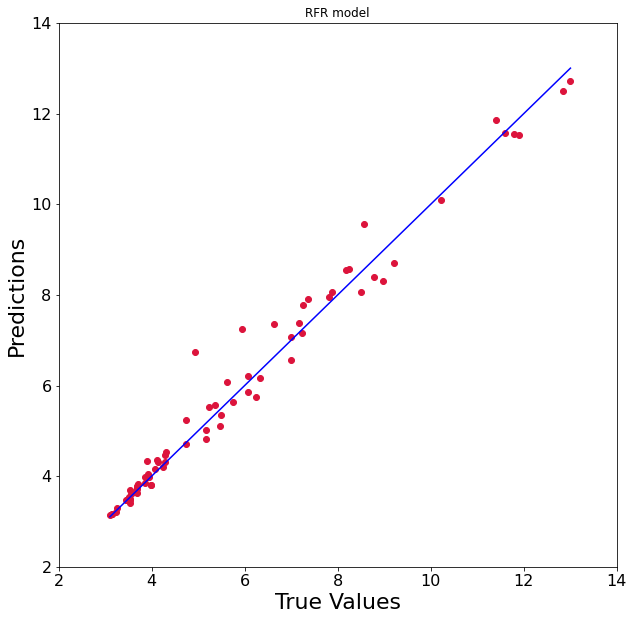

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=22)
plt.ylabel('Predictions', fontsize=22)
#lt.axis('equal')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("RFR model")
plt.xlim(2, 14)
plt.ylim(2, 14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
plt.savefig("RFR_model.eps")